# Reference Scenarios

In [1]:
import sys
sys.path.append('../..')
from mplc.scenario import Scenario
from mplc.experiment import Experiment
from mplc.corruption import Randomize
import pathlib

2021-07-15 16:08:16.175 | INFO     | mplc.utils:init_gpu_config:107 - Found GPU: /physical_device:GPU:0


## Parameters

In [2]:
NB_EPOCH=40
NB_MINIBATCH=20
NB_GRAD_UPDATE=8

## Scenarios

### #1 | A duo: The Hero and its Sidekick [MNIST]

Stratified split of data among 2 partners (70% / 30%)

In [3]:
sc1 = Scenario(
                scenario_id=1,
                partners_count=2,
                dataset='mnist',
                amounts_per_partner=[0.7, 0.3],
                samples_split_option='stratified',
                multi_partner_learning_approach='fedavg', #default
                aggregation='data-volume', #default
                contributivity_methods=["Independent scores","Shapley values"],
                epoch_count=NB_EPOCH,
                minibatch_count=NB_MINIBATCH,
                gradient_updates_per_pass_count=NB_GRAD_UPDATE,
            )

2021-07-15 16:08:19 | INFO    | Splitting data among partners: starting now.
2021-07-15 16:08:19 | INFO    | Coherence of config parameters: OK.
2021-07-15 16:08:19 | INFO    | Train data split: starting now.
2021-07-15 16:08:26 | INFO    | Partner #0: 37800 samples with labels [2 3 4 5 6 7 8 9]
2021-07-15 16:08:26 | INFO    | Partner #1: 16200 samples with labels [0 1 2]
2021-07-15 16:08:26 | INFO    | Description of data scenario configured:


2021-07-15 16:08:26 | INFO    |    Number of partners defined: 2
2021-07-15 16:08:26 | INFO    |    Data distribution scenario chosen: Stratified Splitter
2021-07-15 16:08:26 | INFO    |    Multi-partner learning approach: fedavg
2021-07-15 16:08:26 | INFO    |    Weighting option: data-volume
2021-07-15 16:08:26 | INFO    |    Iterations parameters: 40 epochs > 20 mini-batches > 8 gradient updates per pass
2021-07-15 16:08:26 | INFO    | Data loaded: mnist
2021-07-15 16:08:26 | INFO    |    54000 train data with 54000 labels
2021-07-15 16:08:26 | INFO    |    6000 val data with 6000 labels
2021-07-15 16:08:26 | INFO    |    10000 test data with 10000 labels


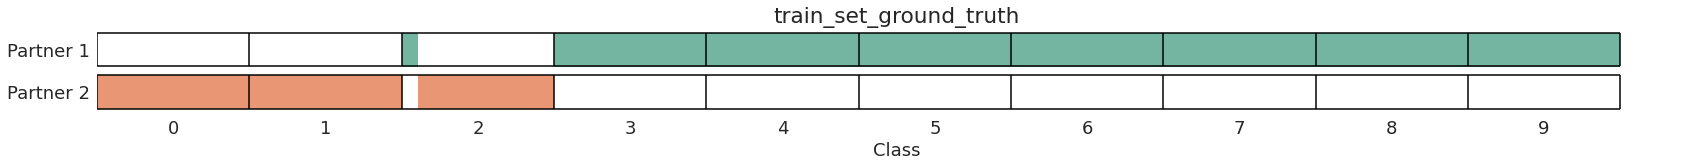

In [4]:
sc1.plot_data_distribution()

### #2 | A different duo: Good cop / Bad cop [CIFAR10]

Random split of data among 2 partners (70% / 30%). Half of the 2nd partner’s data is corrupted.

In [5]:
sc2 = Scenario(
                scenario_id=2,
                partners_count=2,
                dataset='cifar10',
                amounts_per_partner=[0.7, 0.3],
                samples_split_option='random', #default
                corruption_parameters=['not-corrupted',Randomize(proportion=0.5)],
                multi_partner_learning_approach='fedavg', #default
                aggregation='data-volume', #default
                contributivity_methods=["Independent scores","Shapley values"],
                epoch_count=NB_EPOCH,
                minibatch_count=NB_MINIBATCH,
                gradient_updates_per_pass_count=NB_GRAD_UPDATE,
            )

2021-07-15 16:08:28 | INFO    | Splitting data among partners: starting now.
2021-07-15 16:08:28 | INFO    | Coherence of config parameters: OK.
2021-07-15 16:08:28 | INFO    | Train data split: starting now.
2021-07-15 16:08:28 | INFO    | Partner #0: 31499 samples with labels [0 1 2 3 4 5 6 7 8 9]
2021-07-15 16:08:28 | INFO    | Partner #1: 13501 samples with labels [0 1 2 3 4 5 6 7 8 9]
2021-07-15 16:08:28 | INFO    | Description of data scenario configured:


2021-07-15 16:08:28 | INFO    |    Number of partners defined: 2
2021-07-15 16:08:28 | INFO    |    Data distribution scenario chosen: Random Splitter
2021-07-15 16:08:28 | INFO    |    Multi-partner learning approach: fedavg
2021-07-15 16:08:28 | INFO    |    Weighting option: data-volume
2021-07-15 16:08:28 | INFO    |    Iterations parameters: 40 epochs > 20 mini-batches > 8 gradient updates per pass
2021-07-15 16:08:28 | INFO    | Data loaded: cifar10
2021-07-15 16:08:28 | INFO    |    45000 train data with 45000 labels
2021-07-15 16:08:28 | INFO    |    5000 val data with 5000 labels
2021-07-15 16:08:28 | INFO    |    10000 test data with 10000 labels
1


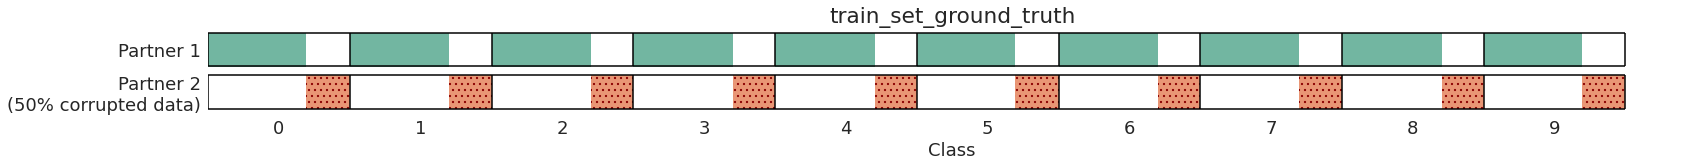

1


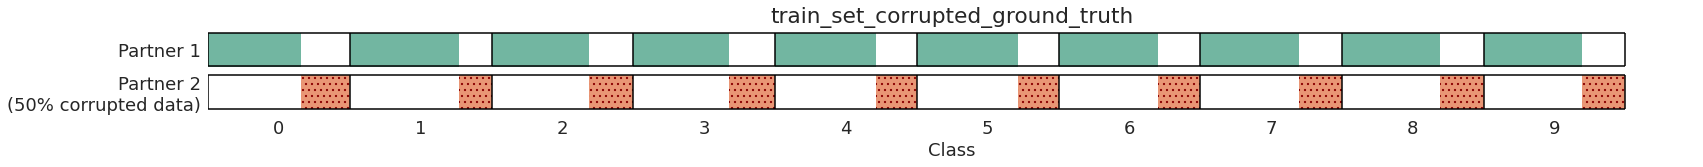

In [6]:
sc2.plot_data_distribution()

### #3 | A trio: Two cool guys and their challenger [CIFAR10]

Mixed split of data among 3 partners (42%, 42%, 16%). Samples of 3 classes are randomly split, cool guys get 3 specific classes each, challenger only 1.

In [7]:
sc3 = Scenario(
                scenario_id=3,
                partners_count=3,
                dataset='cifar10',
                amounts_per_partner=[0.42, 0.42, 0.16],
                samples_split_option='flexible',
                samples_split_configuration=[[0.42, 0.42, 0.42, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], 
                                                [0.42, 0.42, 0.42, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0],
                                                [0.16, 0.16, 0.16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
                                                ],
                multi_partner_learning_approach='fedavg', #default
                aggregation='data-volume', #default
                contributivity_methods=["Independent scores","Shapley values"],
                epoch_count=NB_EPOCH,
                minibatch_count=NB_MINIBATCH,
                gradient_updates_per_pass_count=NB_GRAD_UPDATE,
            )

2021-07-15 16:08:31 | INFO    | Proceeding to a flexible split as requested. Please note that the flexible split currently discards the amounts_per_partner (if provided) and infers amounts of samples per partner from the samples_split_configuration provided.
2021-07-15 16:08:31 | INFO    | Splitting data among partners: starting now.
2021-07-15 16:08:31 | INFO    | Coherence of config parameters: OK.
2021-07-15 16:08:31 | INFO    | Train data split: starting now.
2021-07-15 16:08:37 | INFO    | Partners' relative number of samples: [0.43, 0.43, 0.15]
2021-07-15 16:08:37 | INFO    | Partner #0: 19170 samples with labels [4 5 6 7 8 9]
2021-07-15 16:08:37 | INFO    | Partner #1: 19170 samples with labels [1 2 3 7 8 9]
2021-07-15 16:08:37 | INFO    | Partner #2: 6660 samples with labels [0 7 8 9]
2021-07-15 16:08:37 | INFO    | Description of data scenario configured:
2021-07-15 16:08:37 | INFO    |    Number of partners defined: 3
2021-07-15 16:08:37 | INFO    |    Data distribution scena

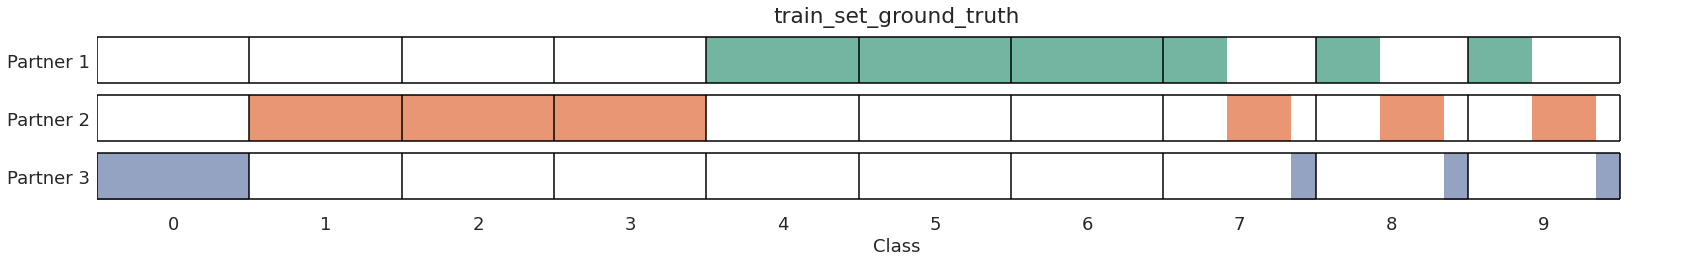

In [8]:
sc3.plot_data_distribution()

### #4 | A quintet: The basketball team with an injured player [CIFAR10]

Random split of data among 5 partners (25%, 20% for 3 partners, 15%). A partner holds only corrupted samples.

In [9]:
sc4 = Scenario(
                scenario_id=4,
                partners_count=5,
                dataset='cifar10',
                amounts_per_partner=[0.25, 0.2, 0.2, 0.2, 0.15],
                samples_split_option='random',  # default
                corruption_parameters=['not-corrupted', 'random', 'not-corrupted', 'not-corrupted', 'not-corrupted'],
                multi_partner_learning_approach='fedavg',  # default
                aggregation='data-volume',  # default
                contributivity_methods=["Independent scores"],  # "Shapley values" too long?
                epoch_count=NB_EPOCH,
                minibatch_count=NB_MINIBATCH,
                gradient_updates_per_pass_count=NB_GRAD_UPDATE,
            )

2021-07-15 16:08:40 | INFO    | Splitting data among partners: starting now.
2021-07-15 16:08:40 | INFO    | Coherence of config parameters: OK.
2021-07-15 16:08:40 | INFO    | Train data split: starting now.
2021-07-15 16:08:40 | INFO    | Partner #0: 11250 samples with labels [0 1 2 3 4 5 6 7 8 9]
2021-07-15 16:08:40 | INFO    | Partner #1: 9000 samples with labels [0 1 2 3 4 5 6 7 8 9]
2021-07-15 16:08:40 | INFO    | Partner #2: 9000 samples with labels [0 1 2 3 4 5 6 7 8 9]
2021-07-15 16:08:40 | INFO    | Partner #3: 9000 samples with labels [0 1 2 3 4 5 6 7 8 9]
2021-07-15 16:08:40 | INFO    | Partner #4: 6750 samples with labels [0 1 2 3 4 5 6 7 8 9]
2021-07-15 16:08:40 | INFO    | Description of data scenario configured:


2021-07-15 16:08:40 | INFO    |    Number of partners defined: 5
2021-07-15 16:08:40 | INFO    |    Data distribution scenario chosen: Random Splitter
2021-07-15 16:08:40 | INFO    |    Multi-partner learning approach: fedavg
2021-07-15 16:08:40 | INFO    |    Weighting option: data-volume
2021-07-15 16:08:40 | INFO    |    Iterations parameters: 40 epochs > 20 mini-batches > 8 gradient updates per pass
2021-07-15 16:08:40 | INFO    | Data loaded: cifar10
2021-07-15 16:08:40 | INFO    |    45000 train data with 45000 labels
12021-07-15 16:08:40 | INFO    |    5000 val data with 5000 labels

2021-07-15 16:08:40 | INFO    |    10000 test data with 10000 labels


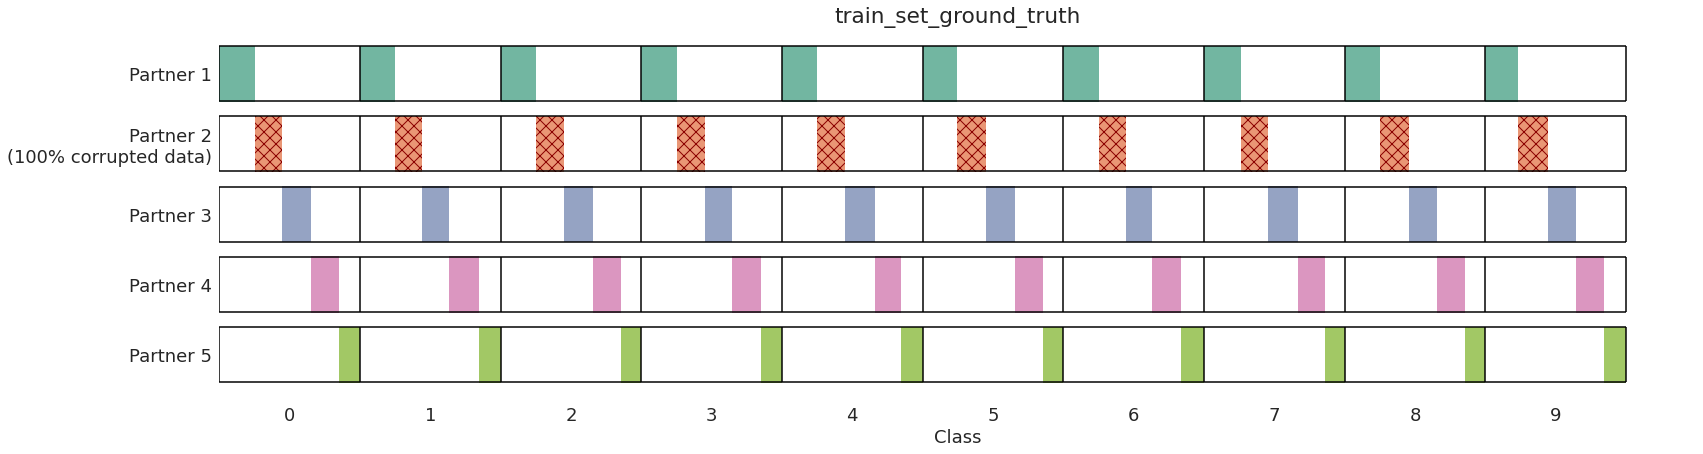

1


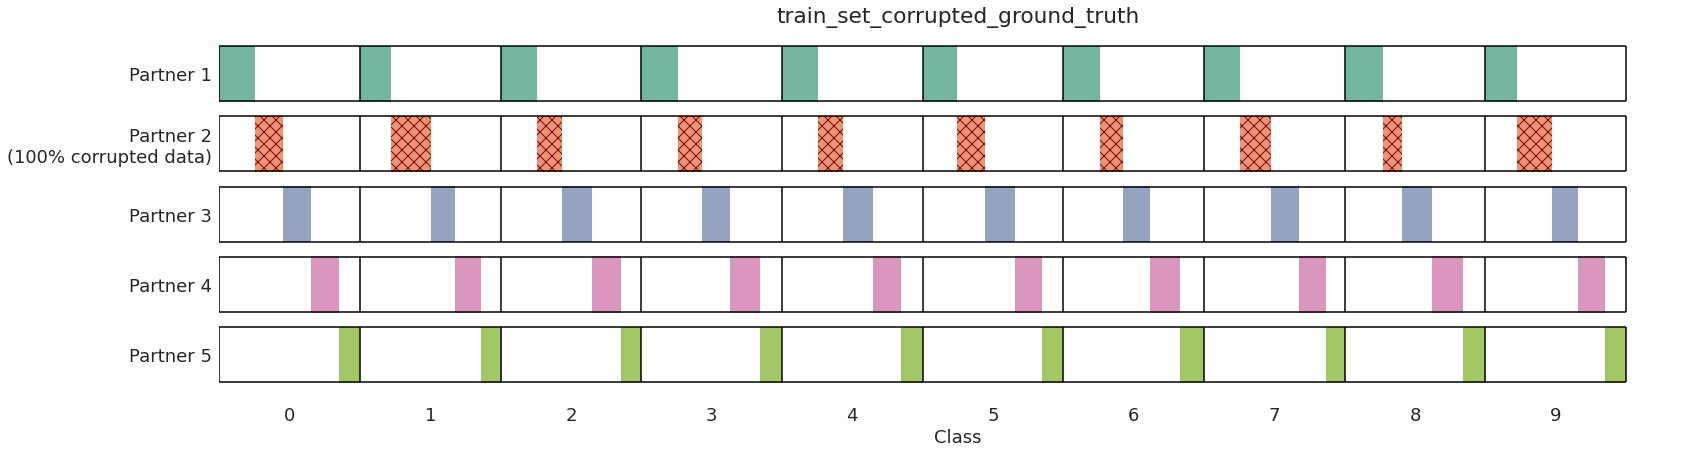

In [10]:
sc4.plot_data_distribution()

### #5 | A band: The soccer team with 2 substitutes and an injured player [MNIST]

Mixed split of data among 11 partners. 9 partners share 8 classes, the 2 other each hold 1 specific class. 1 of the 9 partners sharing classes holds corrupted samples.

In [11]:
sc5 = Scenario(
                scenario_id=5,
                partners_count=11,
                dataset='mnist',
                amounts_per_partner=[0.8/9.0]*9 + [0.1]*2,
                samples_split_option='advanced',
                samples_split_configuration=[[8, 'shared']]*9 + [[1, 'specific']]*2,
                corruption_parameters=['not-corrupted']*5 + ['random'] + ['not-corrupted']*5,
                multi_partner_learning_approach='fedavg',  # default
                aggregation='data-volume',  # default
                contributivity_methods=["Independent scores"], # "Shapley values" too long?
                epoch_count=NB_EPOCH,
                minibatch_count=NB_MINIBATCH,
                gradient_updates_per_pass_count=NB_GRAD_UPDATE,
            )

2021-07-15 16:08:43 | INFO    | Splitting data among partners: starting now.
2021-07-15 16:08:43 | INFO    | Coherence of config parameters: OK.
2021-07-15 16:08:43 | INFO    | Train data split: starting now.
2021-07-15 16:08:50 | INFO    | Partners' relative number of samples: [0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.1, 0.1] (versus initially configured: [0.08888888888888889, 0.08888888888888889, 0.08888888888888889, 0.08888888888888889, 0.08888888888888889, 0.08888888888888889, 0.08888888888888889, 0.08888888888888889, 0.08888888888888889, 0.1, 0.1])
2021-07-15 16:08:50 | INFO    | Partner #0: 4336 samples with labels [2 3 4 5 6 7 8 9]
2021-07-15 16:08:50 | INFO    | Partner #1: 4336 samples with labels [2 3 4 5 6 7 8 9]
2021-07-15 16:08:50 | INFO    | Partner #2: 4336 samples with labels [2 3 4 5 6 7 8 9]
2021-07-15 16:08:50 | INFO    | Partner #3: 4336 samples with labels [2 3 4 5 6 7 8 9]
2021-07-15 16:08:50 | INFO    | Partner #4: 4336 samples with labels [2 3 4 5

2021-07-15 16:08:50 | INFO    |    Data distribution scenario chosen: Advanced Splitter[(8, 'shared'), (8, 'shared'), (8, 'shared'), (8, 'shared'), (8, 'shared'), (8, 'shared'), (8, 'shared'), (8, 'shared'), (8, 'shared'), (1, 'specific'), (1, 'specific')]
2021-07-15 16:08:50 | INFO    |    Multi-partner learning approach: fedavg
2021-07-15 16:08:50 | INFO    |    Weighting option: data-volume
2021-07-15 16:08:50 | INFO    |    Iterations parameters: 40 epochs > 20 mini-batches > 8 gradient updates per pass
2021-07-15 16:08:50 | INFO    | Data loaded: mnist
2021-07-15 16:08:50 | INFO    |    54000 train data with 54000 labels
2021-07-15 16:08:50 | INFO    |    6000 val data with 6000 labels
2021-07-15 16:08:50 | INFO    |    10000 test data with 10000 labels
5


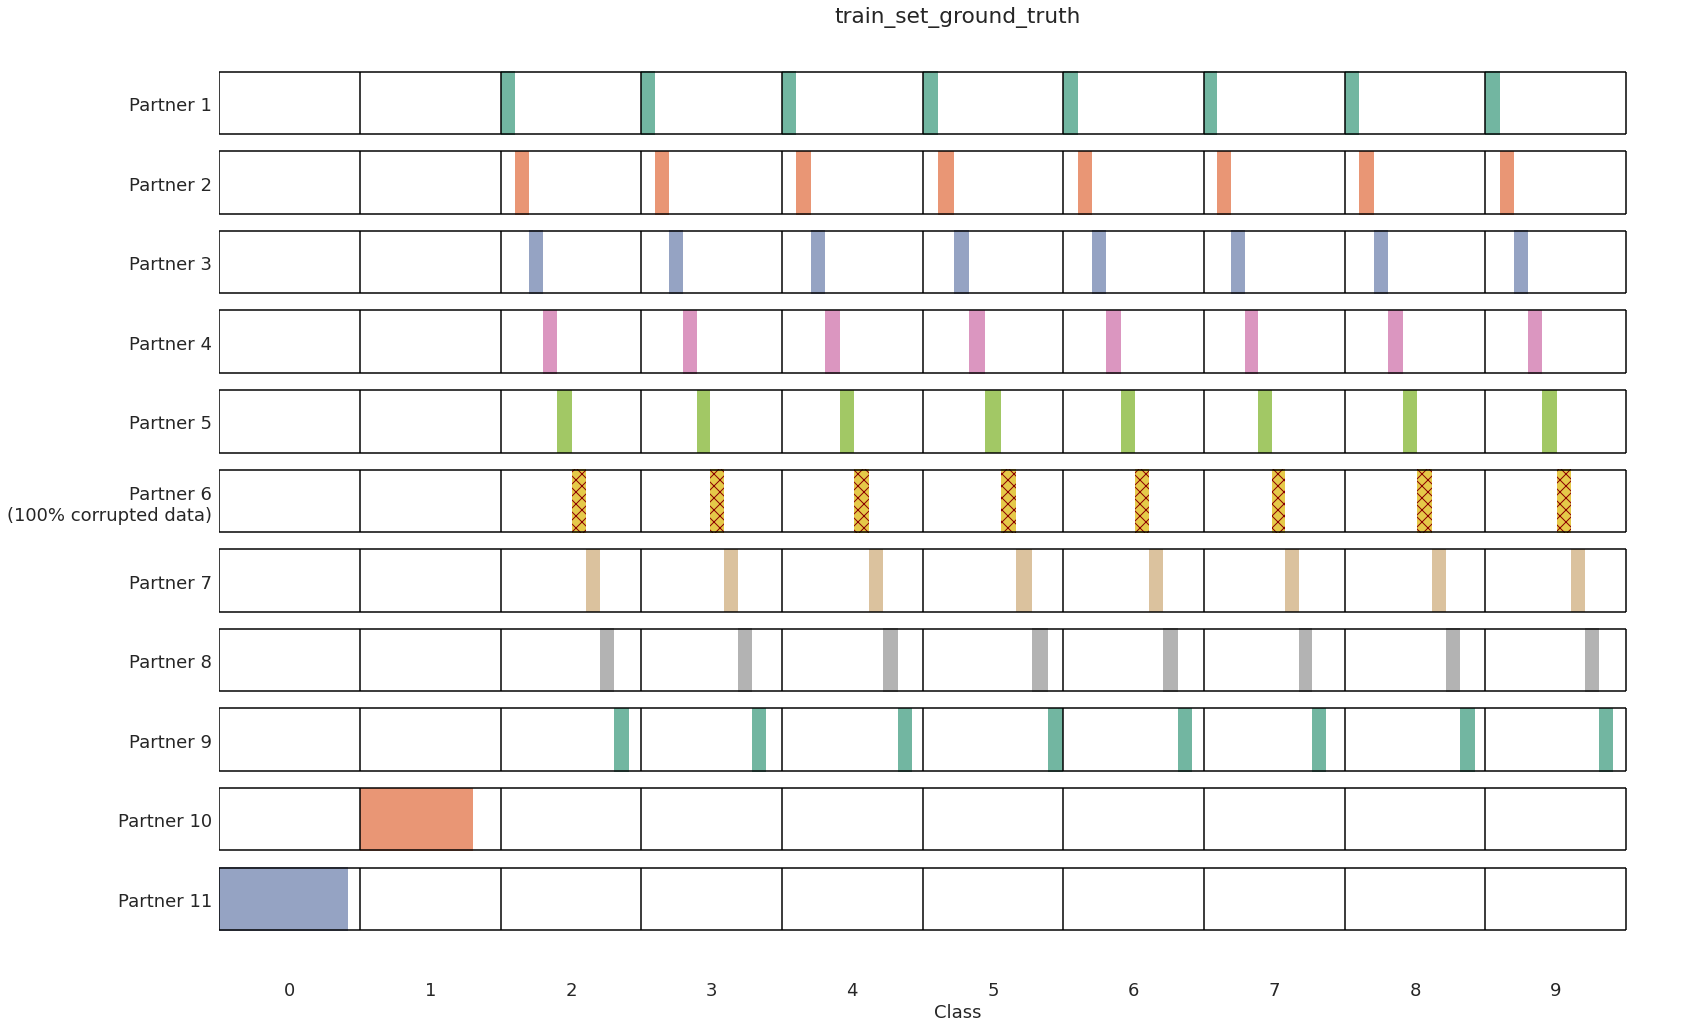

5


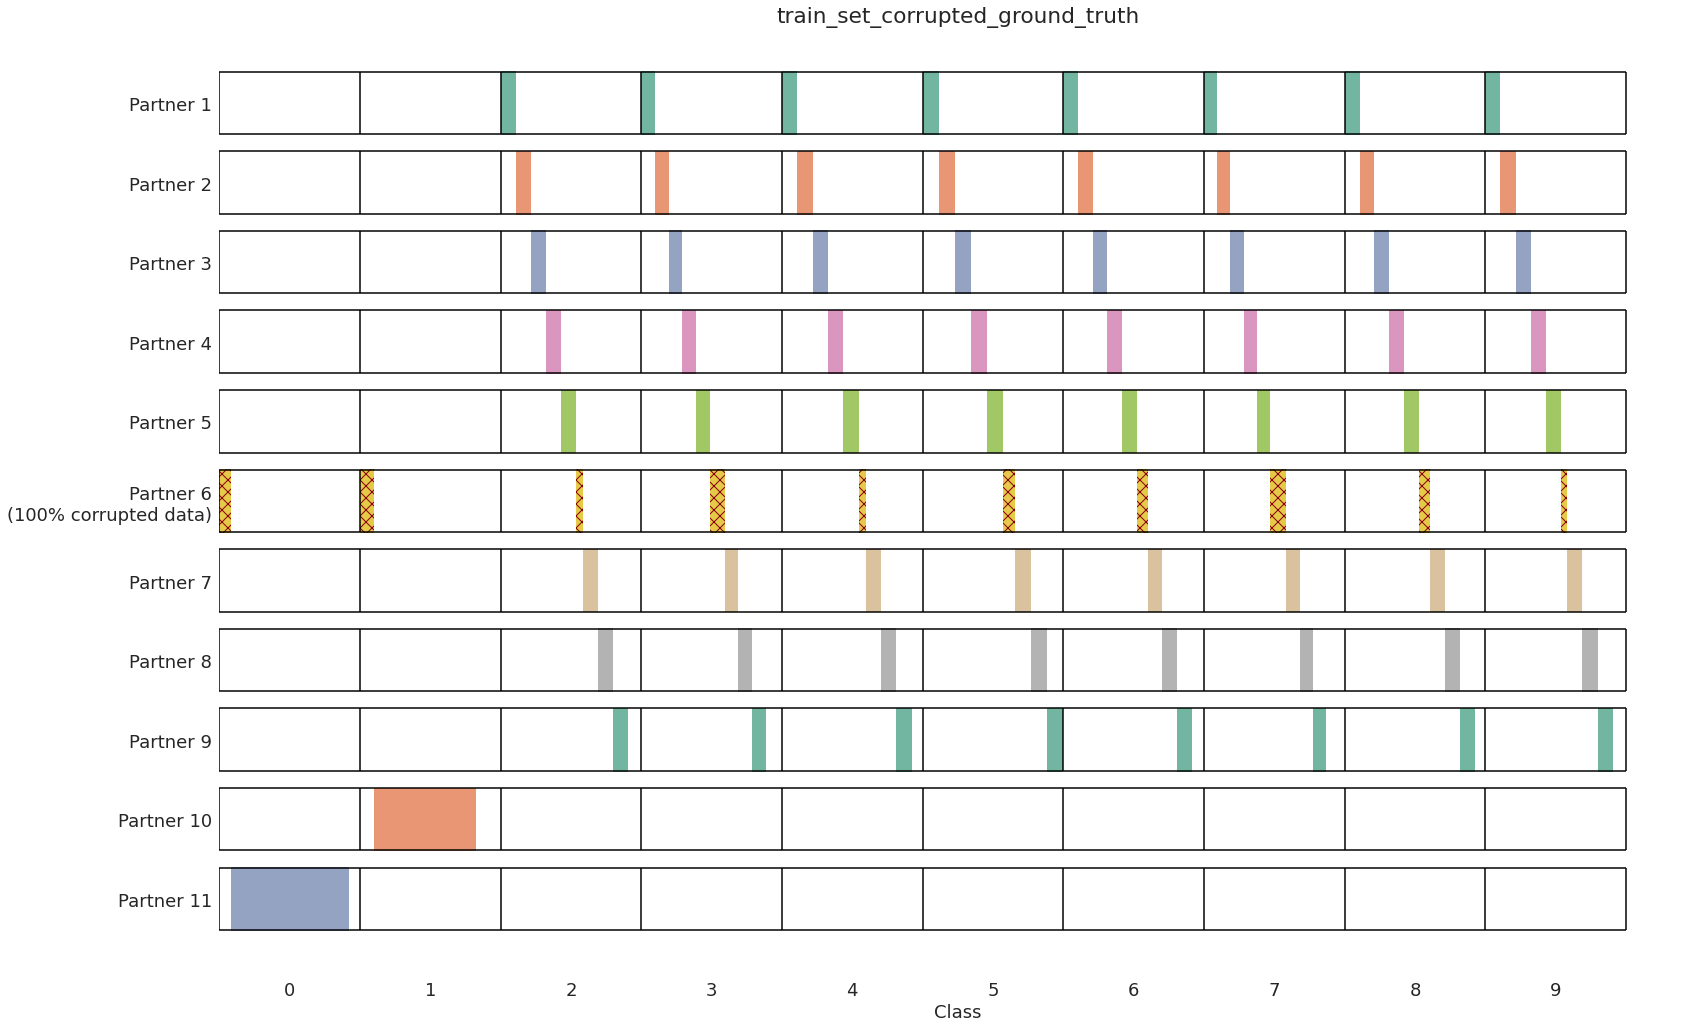

In [12]:
sc5.plot_data_distribution()

## Experiment

In [ ]:
exp = Experiment(
                experiment_name='benchmarks', 
                nb_repeats=10, 
                scenarios_list=[sc1,sc2,sc3,sc4,sc5],
                is_save=True,
                experiment_path=pathlib.Path('saved_benchmarks')
    )

exp.run()